In [1]:
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_breast_cancer, load_iris, load_wine
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
iris = load_iris()
wine = load_wine()
breast_cancer = load_breast_cancer()

# Split into features and target
x_iris, y_iris = iris.data, iris.target
x_wine, y_wine = wine.data, wine.target
x_breast_cancer, y_breast_cancer = breast_cancer.data, breast_cancer.target

In [3]:
x_train_iris, x_test_iris, y_train_iris, y_test_iris = train_test_split(x_iris, y_iris, test_size=0.2, random_state=42)
x_train_wine, x_test_wine, y_train_wine, y_test_wine = train_test_split(x_wine, y_wine, test_size=0.2, random_state=42)
x_train_breast_cancer, x_test_breast_cancer, y_train_breast_cancer, y_test_breast_cancer = train_test_split(
x_breast_cancer, y_breast_cancer, test_size=0.2, random_state=42)

In [4]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
gb = GradientBoostingClassifier(n_estimators=100, random_state=42)

# Create separate Voting Classifiers for each dataset
voting_iris = VotingClassifier(estimators=[('rf', rf), ('gb', gb)], voting='soft')
voting_wine = VotingClassifier(estimators=[('rf', rf), ('gb', gb)], voting='soft')
voting_breast_cancer = VotingClassifier(estimators=[('rf', rf), ('gb', gb)], voting='soft')

In [5]:
voting_iris.fit(x_train_iris, y_train_iris)
y_pred_iris = voting_iris.predict(x_test_iris)

voting_wine.fit(x_train_wine, y_train_wine)
y_pred_wine = voting_wine.predict(x_test_wine)

voting_breast_cancer.fit(x_train_breast_cancer, y_train_breast_cancer)
y_pred_breast_cancer = voting_breast_cancer.predict(x_test_breast_cancer)

In [6]:
def evaluate_model(y_true, y_pred, dataset_name):
    print(f"\n--- {dataset_name} Dataset ---")
    print(f"Accuracy: {accuracy_score(y_true, y_pred):.4f}")
    print(f"Classification Report:\n{classification_report(y_true, y_pred)}")
    print(f"Confusion Matrix:\n{confusion_matrix(y_true, y_pred)}")

# Evaluations
evaluate_model(y_test_iris, y_pred_iris, "Iris")
evaluate_model(y_test_wine, y_pred_wine, "Wine")
evaluate_model(y_test_breast_cancer, y_pred_breast_cancer, "Breast Cancer")


--- Iris Dataset ---
Accuracy: 1.0000
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

--- Wine Dataset ---
Accuracy: 0.9444
Classification Report:
              precision    recall  f1-score   support

           0       0.93      1.00      0.97        14
           1       0.93      0.93      0.93        14
           2       1.00      0.88      0.93         8

    accuracy                           0.94        36
   macro avg       0.95      0.93      0.94        36
weighted avg       0.95      0.94      0.94        36

Confusion Matrix:
[[14  0  0]
 [ 1 13  0]
 [ 0  1  7]]

---

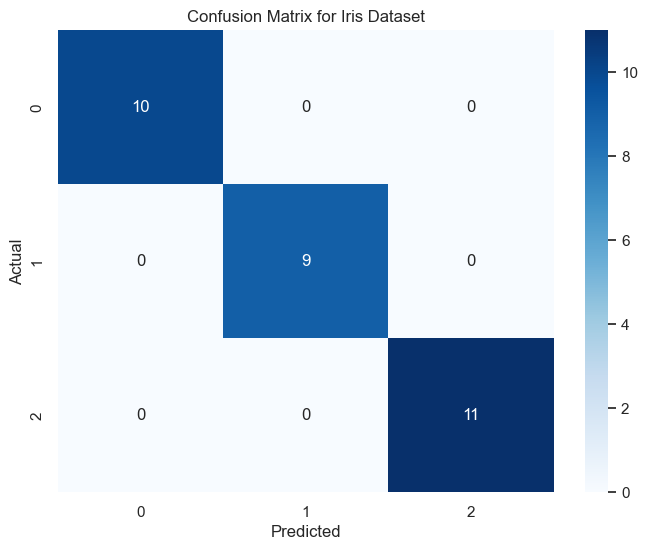

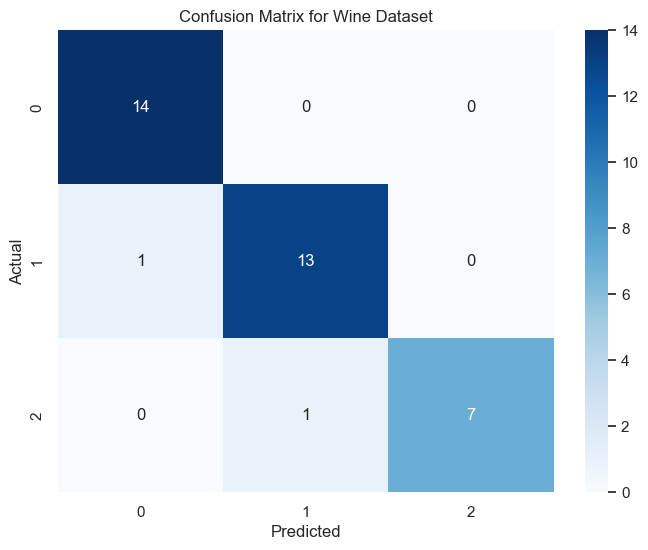

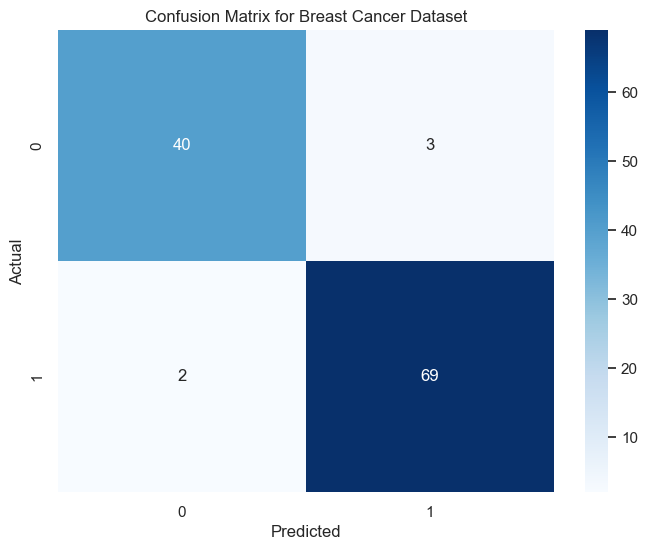

In [7]:
datasets = {
    "Iris": (y_test_iris, y_pred_iris),
    "Wine": (y_test_wine, y_pred_wine),
    "Breast Cancer": (y_test_breast_cancer, y_pred_breast_cancer)
}

sns.set(style='whitegrid')

for name, (y_true, y_pred) in datasets.items():
    plt.figure(figsize=(8, 6))
    sns.heatmap(confusion_matrix(y_true, y_pred), annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix for {name} Dataset')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()